In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def fetch_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    df = df[['Close']]  # We only need the closing price for this strategy
    return df

In [ ]:
def plot_strategy(df, ticker):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label=f'{ticker} Price', color='black', alpha=0.6)
    plt.plot(df['Short_MA'], label=f'{ticker} Short_term', color='blue', alpha=0.6)
    plt.plot(df['Long_MA'], label=f'{ticker} Long_term', color='red', alpha=0.6)
     # Plot buy signals

    plt.plot(df[df['Position'] == 1].index, df['Short_MA'][df['Position'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')



    # Plot sell signals

    plt.plot(df[df['Position'] == -1].index, df['Short_MA'][df['Position'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')
    plt.title(f'{ticker} Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
def calculate_moving_averages(df,short_window,long_window):
    df['Short_MA']=df['Close'].rolling(window=short_window,min_periods=1).mean()
    df['Long_MA']=df['Close'].rolling(window=long_window,min_periods=1).mean()
    return df

In [ ]:

if __name__ == "__main__":
    # User inputs
    ticker = 'GOOGL'
    start_date = '2020-01-01'
    end_date = '2023-01-01'
    short_window = 50
    long_window = 200

    # Fetch data
    df = fetch_data(ticker, start_date, end_date)
    df=calculate_moving_averages(df,short_window,long_window)
    df= generate_signals(df)
    df=backtest_strategy(df)
    # Calculate performance metrics

    metrics = calculate_performance_metrics(df)






[*********************100%***********************]  1 of 1 completed
<ipython-input-5-08f0ad88c087>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Short_MA']=df['Close'].rolling(window=short_window,min_periods=1).mean()
<ipython-input-5-08f0ad88c087>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Long_MA']=df['Close'].rolling(window=long_window,min_periods=1).mean()
<ipython-input-13-b2b24a861e36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

Performance Metrics:
Cumulative Return: 0.8365
Annualized Return: 0.2251
Annualized Volatility: 0.2109
Sharpe Ratio: 1.0674
Max Drawdown: 3229.2781


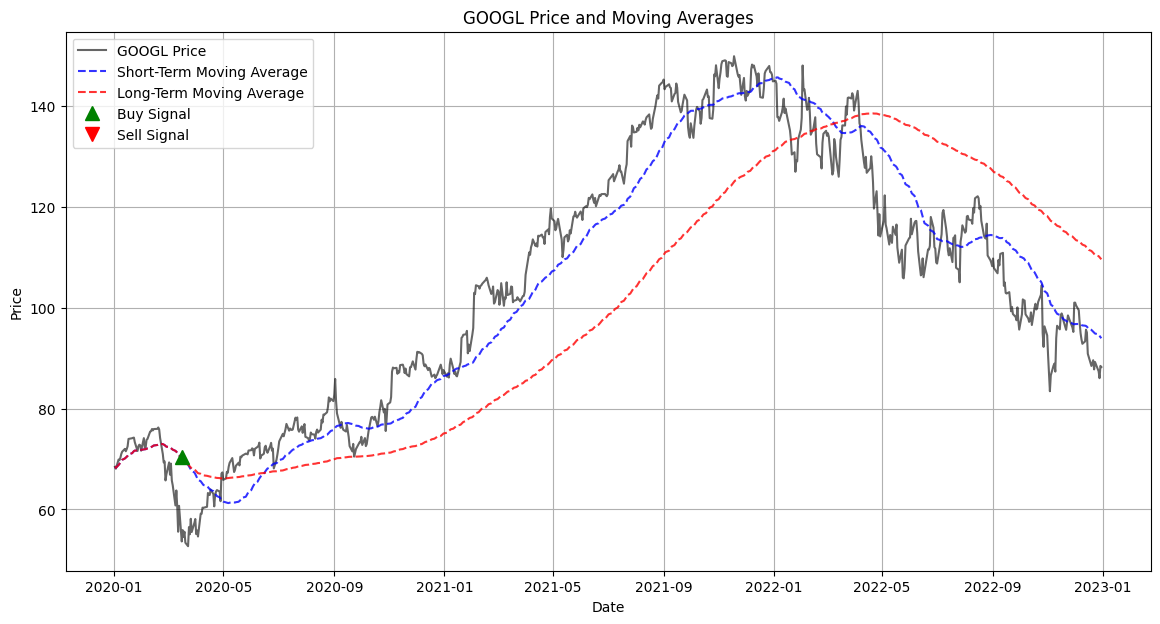

In [ ]:
 # Visualize the strategy
plot_strategy(df, ticker)

In [ ]:
if __name__ == "__main__":
    # User inputs
    ticker = 'AAPL'
    start_date = '2020-01-01'
    end_date = '2023-01-01'
    short_window = 50
    long_window = 200

    # Fetch data
    df = fetch_data(ticker, start_date, end_date)
    df=calculate_moving_averages(df,short_window,long_window)

[*********************100%***********************]  1 of 1 completed
<ipython-input-5-08f0ad88c087>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Short_MA']=df['Close'].rolling(window=short_window,min_periods=1).mean()
<ipython-input-5-08f0ad88c087>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Long_MA']=df['Close'].rolling(window=long_window,min_periods=1).mean()


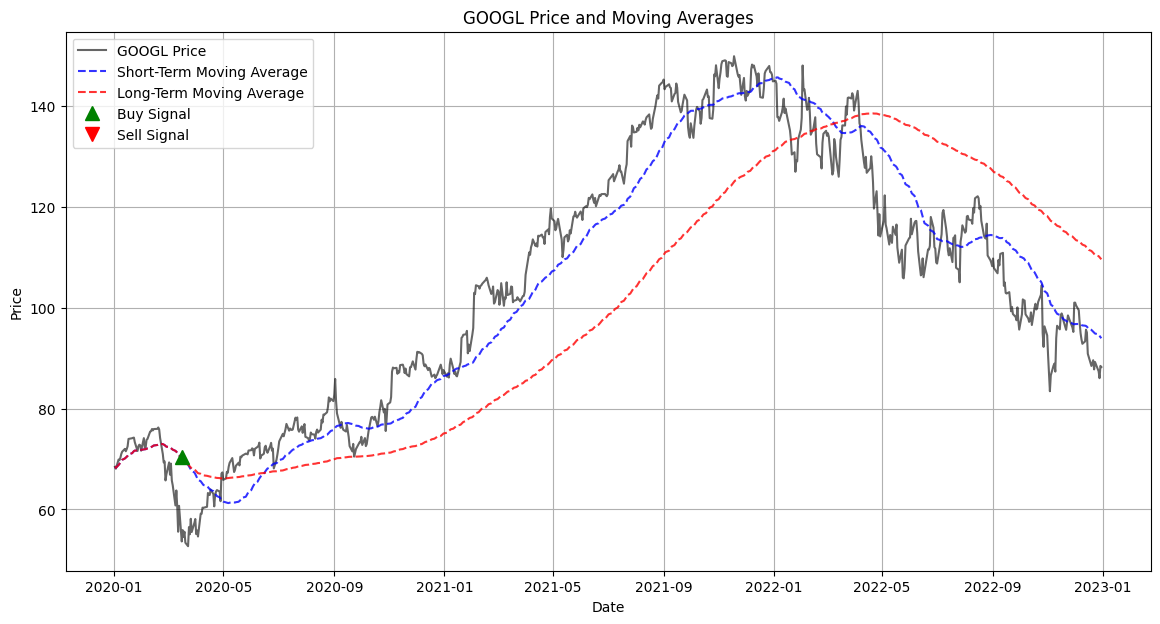

In [ ]:
plot_strategy(df, ticker)

In [ ]:
# Function to generate trading signals

def generate_signals(df):

    df['Signal'] = 0

    df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, -1)

    df['Position'] = df['Signal'].diff()

    return df

In [ ]:
def plot_strategy(df, ticker):

    plt.figure(figsize=(14, 7))

    plt.plot(df['Close'], label=f'{ticker} Price', color='black', alpha=0.6)

    plt.plot(df['Short_MA'], label='Short-Term Moving Average', color='blue', linestyle='--', alpha=0.8)

    plt.plot(df['Long_MA'], label='Long-Term Moving Average', color='red', linestyle='--', alpha=0.8)



    # Plot buy signals

    plt.plot(df[df['Position'] == 1].index, df['Short_MA'][df['Position'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')



    # Plot sell signals

    plt.plot(df[df['Position'] == -1].index, df['Short_MA'][df['Position'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')



    plt.title(f'{ticker} Price and Moving Averages')

    plt.xlabel('Date')

    plt.ylabel('Price')

    plt.legend()

    plt.grid()

    plt.show()

In [ ]:
# Function to backtest the strategy

def backtest_strategy(df, initial_capital=10000):

    df['Availabale Cash'] = initial_capital

    df['Shares_held'] = 0



    for i in range(1, len(df)):

        if df['Shares_held'].iloc[i-1] == 0 and df['Signal'].iloc[i] == 1:

            df['Shares_held'].iloc[i] = df['Availabale Cash'].iloc[i-1] / df['Close'].iloc[i]

            df['Availabale Cash'].iloc[i] = 0

        elif df['Shares_held'].iloc[i-1] > 0 and df['Signal'].iloc[i] == -1:

            df['Availabale Cash'].iloc[i] = df['Shares_held'].iloc[i-1] * df['Close'].iloc[i]

            df['Shares_held'].iloc[i] = 0

        else:

            df['Availabale Cash'].iloc[i] = df['Availabale Cash'].iloc[i-1]

            df['Shares_held'].iloc[i] = df['Shares_held'].iloc[i-1]



    df['Portfolio Total'] = df['Availabale Cash'] + (df['Shares_held'] * df['Close'])

    return df

In [ ]:
print(df)

                Close   Short_MA     Long_MA  Signal  Position  \
Date                                                             
2020-01-02  68.433998  68.433998   68.433998       0       NaN   
2020-01-03  68.075996  68.254997   68.254997       0       0.0   
2020-01-06  69.890503  68.800166   68.800166       0       0.0   
2020-01-07  69.755501  69.039000   69.039000       0       0.0   
2020-01-08  70.251999  69.281599   69.281599       0       0.0   
...               ...        ...         ...     ...       ...   
2022-12-23  89.230003  94.872000  110.421038      -1       0.0   
2022-12-27  87.389999  94.688600  110.208635      -1       0.0   
2022-12-28  86.019997  94.409600  110.008980      -1       0.0   
2022-12-29  88.449997  94.163200  109.805240      -1       0.0   
2022-12-30  88.230003  93.935201  109.579988      -1       0.0   

            Availabale Cash  Shares_held  Portfolio Total  
Date                                                       
2020-01-02     10000.

In [ ]:
# Function to calculate performance metrics

def calculate_performance_metrics(df):

    df['Daily Return'] = df['Portfolio Total'].pct_change()

    cumulative_return = (df['Portfolio Total'].iloc[-1] / df['Portfolio Total'].iloc[0]) - 1

    annualized_return = df['Daily Return'].mean() * 252

    annualized_volatility = df['Daily Return'].std() * np.sqrt(252)

    sharpe_ratio = annualized_return / annualized_volatility

    max_drawdown = (df['Portfolio Total'].cummax() - df['Portfolio Total']).max()



    return {

        'Cumulative Return': cumulative_return,

        'Annualized Return': annualized_return,

        'Annualized Volatility': annualized_volatility,

        'Sharpe Ratio': sharpe_ratio,

        'Max Drawdown': max_drawdown

    }

In [ ]:
print("Performance Metrics:")
for key, value in metrics.items():

        print(f"{key}: {value:.4f}")



Performance Metrics:
Cumulative Return: 0.8365
Annualized Return: 0.2251
Annualized Volatility: 0.2109
Sharpe Ratio: 1.0674
Max Drawdown: 3229.2781
